In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("Tatapower.xlsx")
df.head() 

Date   Price    Open    High     Low   Volume    Chg%
0 2021-07-18  122.90  125.95  128.40  121.25   20.89M -0.0101
1 2021-07-11  124.15  126.00  126.50  122.95  105.33M -0.0024
2 2021-07-04  124.45  121.95  126.90  121.70  170.39M  0.0289
3 2021-06-27  120.95  122.00  124.75  120.60  130.06M -0.0012
4 2021-06-20  121.10  118.20  125.10  117.95  172.13M -0.0029

In [3]:
df['Volume'] = df['Volume'].str.replace('M','')
df.head()

Date   Price    Open    High     Low  Volume    Chg%
0 2021-07-18  122.90  125.95  128.40  121.25   20.89 -0.0101
1 2021-07-11  124.15  126.00  126.50  122.95  105.33 -0.0024
2 2021-07-04  124.45  121.95  126.90  121.70  170.39  0.0289
3 2021-06-27  120.95  122.00  124.75  120.60  130.06 -0.0012
4 2021-06-20  121.10  118.20  125.10  117.95  172.13 -0.0029

In [4]:
df.shape

(603, 7)

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    603 non-null    datetime64[ns]
 1   Price   603 non-null    float64       
 2   Open    603 non-null    float64       
 3   High    603 non-null    float64       
 4   Low     603 non-null    float64       
 5   Volume  603 non-null    object        
 6   Chg%    603 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 33.1+ KB


In [6]:
df['Volume'] = df['Volume'].apply(pd.to_numeric, errors='coerce')

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    603 non-null    datetime64[ns]
 1   Price   603 non-null    float64       
 2   Open    603 non-null    float64       
 3   High    603 non-null    float64       
 4   Low     603 non-null    float64       
 5   Volume  603 non-null    float64       
 6   Chg%    603 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 33.1 KB


In [8]:
df.isnull().values.any()

False

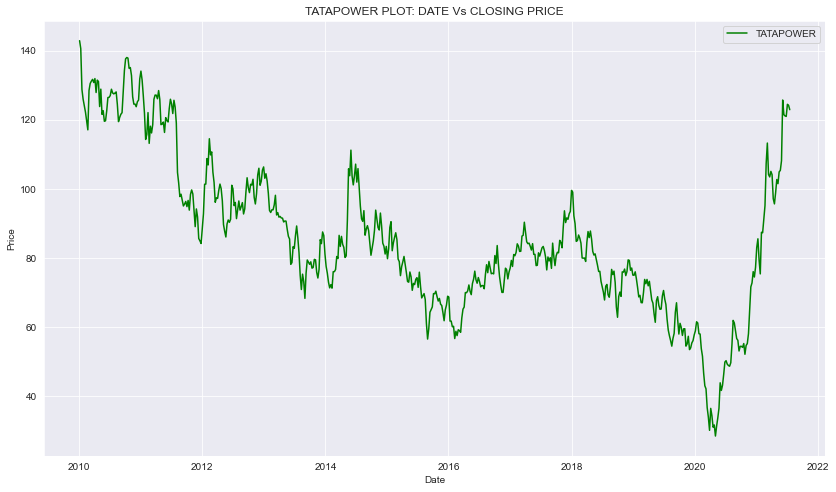

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
plt.plot(df.Date,df.Price,'g')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("TATAPOWER PLOT: DATE Vs CLOSING PRICE")
plt.legend(["TATAPOWER"])

<AxesSubplot:xlabel='Date', ylabel='Volume'>

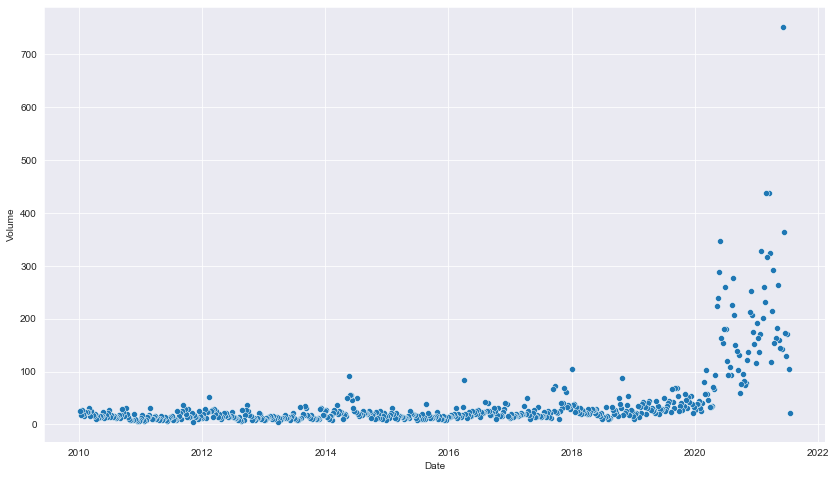

In [10]:
#df.plot(x="Date",y="Volume",figsize=(15,8),title='TATAPOWER PLOT: DATE Vs Volume(million)')
fig_dims = (14, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df, x="Date", y="Volume",ax=ax)

In [11]:
df['Moving Average_9']=df['Price'].rolling(window=9).mean()
df['Moving Average_50']=df['Price'].rolling(window=50).mean()
df['Moving Average_200']=df['Price'].rolling(window=200).mean()
df.head()

Date   Price    Open    High     Low  Volume    Chg%  \
0 2021-07-18  122.90  125.95  128.40  121.25   20.89 -0.0101   
1 2021-07-11  124.15  126.00  126.50  122.95  105.33 -0.0024   
2 2021-07-04  124.45  121.95  126.90  121.70  170.39  0.0289   
3 2021-06-27  120.95  122.00  124.75  120.60  130.06 -0.0012   
4 2021-06-20  121.10  118.20  125.10  117.95  172.13 -0.0029   

   Moving Average_9  Moving Average_50  Moving Average_200  
0               NaN                NaN                 NaN  
1               NaN                NaN                 NaN  
2               NaN                NaN                 NaN  
3               NaN                NaN                 NaN  
4               NaN                NaN                 NaN

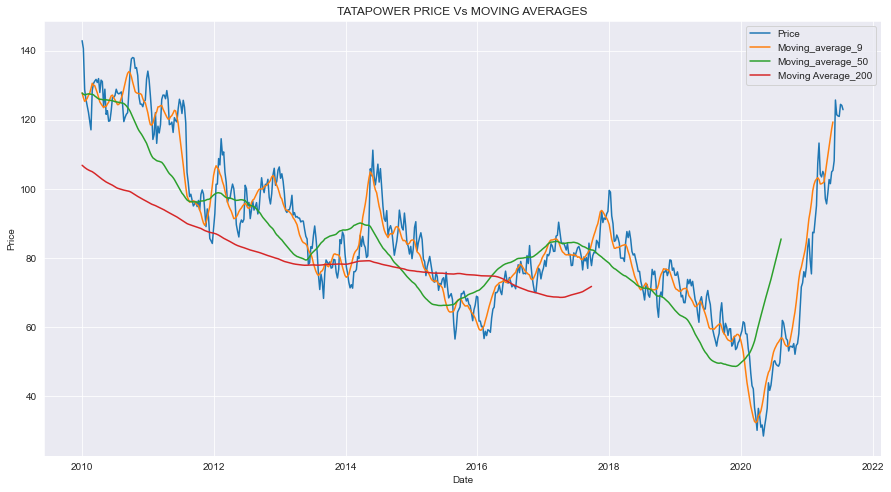

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
plt.plot(df.Date,df.Price)
plt.plot(df.Date,df['Moving Average_9'])
plt.plot(df.Date,df['Moving Average_50'])
plt.plot(df.Date,df['Moving Average_200'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(['Price','Moving_average_9','Moving_average_50','Moving Average_200'])
plt.title("TATAPOWER PRICE Vs MOVING AVERAGES");

In [13]:
x=df.Price.max()
print("The Maximum Closing price for TATAPOWER is",x)

The Maximum Closing price for TATAPOWER is 142.86


In [14]:
x=df.High.max()
print("The Maximum high price for TATAPOWER is",x)

The Maximum high price for TATAPOWER is 146.46


In [15]:
df.max()

Date                  2021-07-18 00:00:00
Price                              142.86
Open                               143.31
High                               146.46
Low                                 139.4
Volume                             751.93
Chg%                               0.2106
Moving Average_9               133.915556
Moving Average_50                127.7128
Moving Average_200               106.8205
dtype: object

<AxesSubplot:>

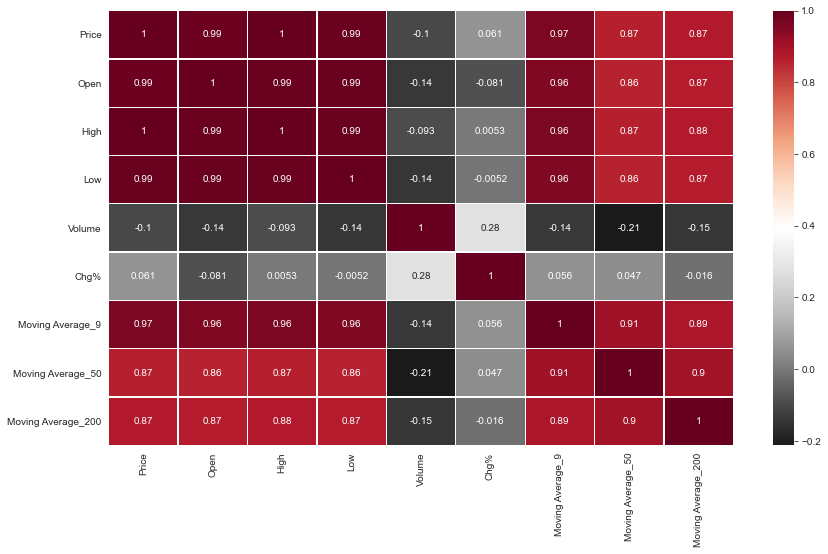

In [16]:
plt.figure(figsize=(14,8))
corr=df.corr()
sns.heatmap(corr,linewidth=0.3,annot=True,cmap="RdGy_r")

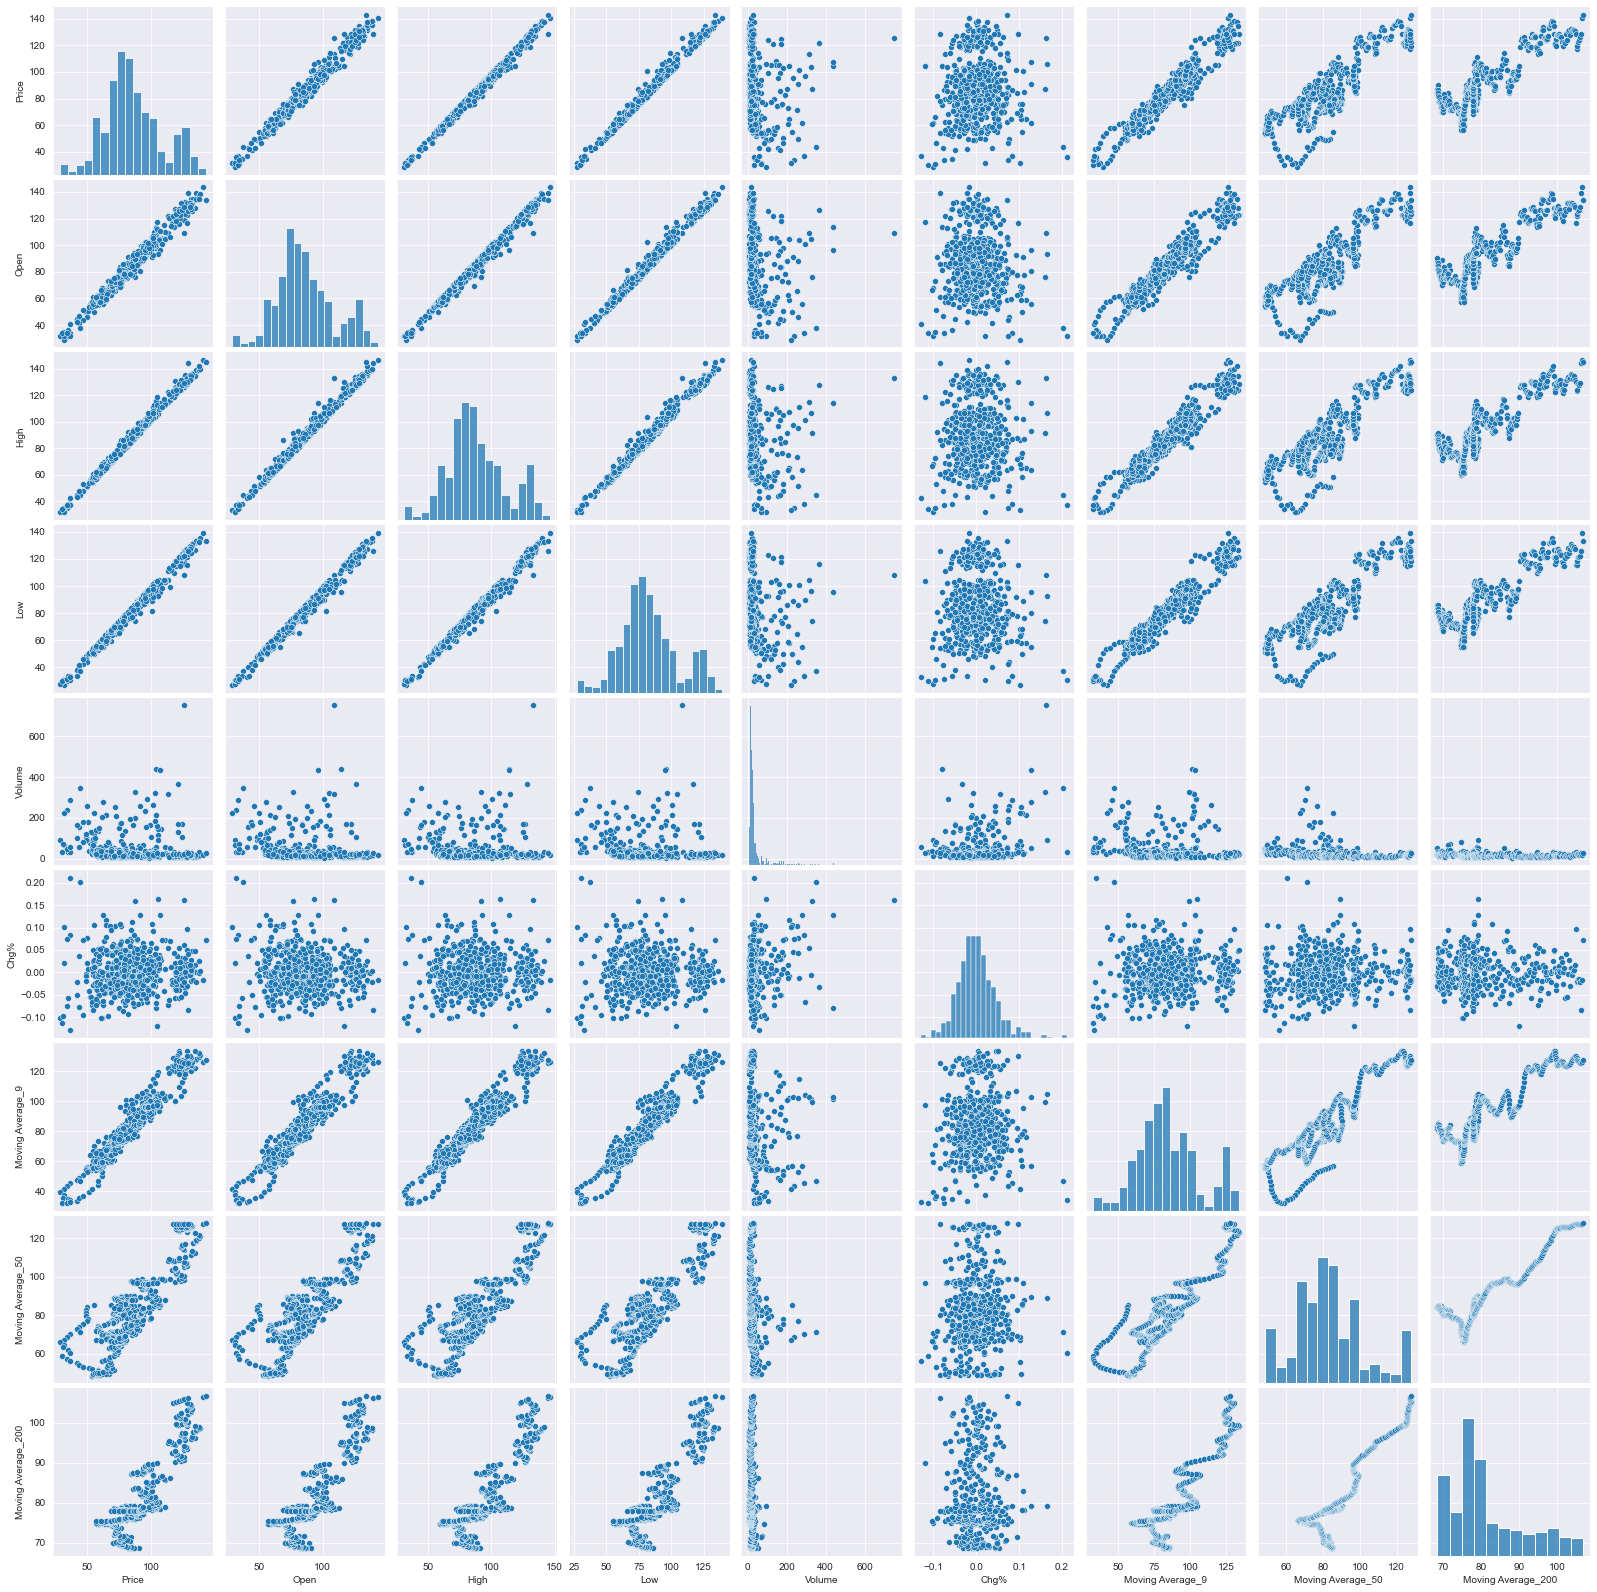

In [17]:
sns.pairplot(df)

In [18]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Price'])
                      ])

fig.update_layout(
    title='Covid Crash',
    yaxis_title='Price',
    shapes = [dict(
        x0='2020-05-12', x1='2020-05-12', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2020-05-12', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Increase Period Begins')]
)


fig.show()

In [19]:
df.head()

Date   Price    Open    High     Low  Volume    Chg%  \
0 2021-07-18  122.90  125.95  128.40  121.25   20.89 -0.0101   
1 2021-07-11  124.15  126.00  126.50  122.95  105.33 -0.0024   
2 2021-07-04  124.45  121.95  126.90  121.70  170.39  0.0289   
3 2021-06-27  120.95  122.00  124.75  120.60  130.06 -0.0012   
4 2021-06-20  121.10  118.20  125.10  117.95  172.13 -0.0029   

   Moving Average_9  Moving Average_50  Moving Average_200  
0               NaN                NaN                 NaN  
1               NaN                NaN                 NaN  
2               NaN                NaN                 NaN  
3               NaN                NaN                 NaN  
4               NaN                NaN                 NaN

<AxesSubplot:title={'center':'TATAPOWER PLOT: DATE VS CHANGE%'}, xlabel='Date'>

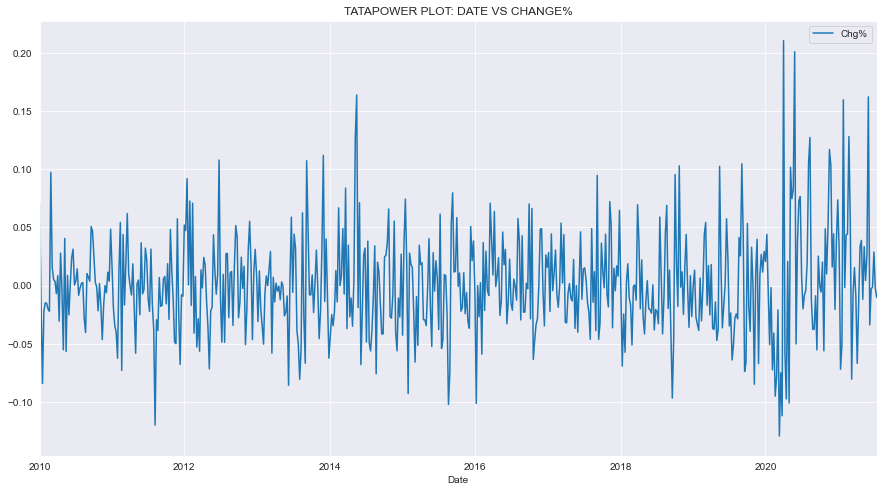

In [20]:
df.plot(x="Date",y="Chg%",figsize=(15,8),title='TATAPOWER PLOT: DATE VS CHANGE%')

In [21]:
def Trend(c):
  if c['Chg%'] < 0:
    return 'Downtrend'
  elif 0 < c['Chg%'] < 0.1:
    return 'Bullish'
  else:
    return 'Verybullish'
df['Trend'] = df.apply(Trend, axis=1)
df.head(15)

Date   Price    Open    High     Low  Volume    Chg%  \
0  2021-07-18  122.90  125.95  128.40  121.25   20.89 -0.0101   
1  2021-07-11  124.15  126.00  126.50  122.95  105.33 -0.0024   
2  2021-07-04  124.45  121.95  126.90  121.70  170.39  0.0289   
3  2021-06-27  120.95  122.00  124.75  120.60  130.06 -0.0012   
4  2021-06-20  121.10  118.20  125.10  117.95  172.13 -0.0029   
5  2021-06-13  121.45  126.25  127.90  116.60  364.00 -0.0338   
6  2021-06-06  125.70  109.00  132.70  108.30  751.93  0.1623   
7  2021-05-30  108.15  105.30  110.50  103.70  143.42  0.0266   
8  2021-05-23  105.35  105.60  109.35  104.50  144.77  0.0043   
9  2021-05-16  104.90  102.50  107.35  101.65  158.97  0.0335   
10 2021-05-09  101.50  103.75  111.15  101.00  263.35 -0.0117   
11 2021-05-02  102.70   97.95  104.65   96.35  182.33  0.0389   
12 2021-04-25   98.85   95.70  101.40   95.50  163.72  0.0335   
13 2021-04-18   95.65   92.40   96.90   91.80  154.42 -0.0154   
14 2021-04-11   97.15  101.00  101.00   89.90  291.12 -0.0668   

    Moving Average_9  Moving Average_50  Moving Average_200        Trend  
0                NaN                NaN                 NaN    Downtrend  
1                NaN                NaN                 NaN    Downtrend  
2                NaN                NaN                 NaN      Bullish  
3                NaN                NaN                 NaN    Downtrend  
4                NaN                NaN                 NaN    Downtrend  
5                NaN                NaN                 NaN    Downtrend  
6                NaN                NaN                 NaN  Verybullish  
7                NaN                NaN                 NaN      Bullish  
8         119.355556                NaN                 NaN      Bullish  
9         117.355556                NaN                 NaN      Bullish  
10        114.838889                NaN                 NaN    Downtrend  
11        112.422222                NaN                 NaN      Bullish  
12        109.966667                NaN                 NaN      Bullish  
13        107.138889                NaN                 NaN    Downtrend  
14        104.438889                NaN                 NaN    Downtrend

Trend on specified date

In [29]:
#df._get_value('2021-6-6', 'Trend')
#df.loc['2021-06-06','Trend']
print(df[df['Date'] == '2021-06-13']['Trend'].values[0])


Downtrend
